In [80]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

# First Glace

In [81]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

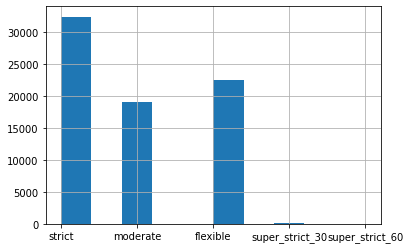

In [83]:
df.cancellation_policy.hist()

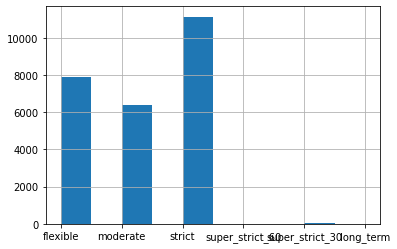

In [84]:
df_test['cancellation_policy'].hist()

# Training Set

In [85]:
train = df[['cancellation_policy','accommodates','number_of_reviews','room_type','city','cleaning_fee']]
train.head()

,cancellation_policy,accommodates,number_of_reviews,room_type,city,cleaning_fee
0,strict,3,2,Entire home/apt,NYC,True
1,strict,7,6,Entire home/apt,NYC,True
2,moderate,5,10,Entire home/apt,NYC,True
3,flexible,4,0,Entire home/apt,SF,True
4,moderate,2,4,Entire home/apt,DC,True


In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cancellation_policy  74111 non-null  object
 1   accommodates         74111 non-null  int64 
 2   number_of_reviews    74111 non-null  int64 
 3   room_type            74111 non-null  object
 4   city                 74111 non-null  object
 5   cleaning_fee         74111 non-null  bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 2.9+ MB


In [87]:
change = []
for i in train.cancellation_policy: 
    if i == 'super_strict_60':
        a = 'strict'
    if i == 'super_strict_30':
        a = 'strict'
    if i == 'long_term':
        a = 'strict'
    if i == 'flexible':
        a = 'flexible'
    if i == 'moderate':
        a = 'moderate'
    if i == 'strict':
        a = 'strict'
    change.append(a)

 
train['cancellation_policy'] = change

In [88]:
list3 = []
for key in train.cleaning_fee:
    if key == True:
        f = 1
    if key == False:
        f = 0
    list3.append(f)
train['cleaning_fee'] = list3

In [89]:
train = pd.get_dummies(train,columns=['room_type','city'])

In [90]:
train

,cancellation_policy,accommodates,number_of_reviews,cleaning_fee,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,strict,3,2,1,1,0,0,0,0,0,0,1,0
1,strict,7,6,1,1,0,0,0,0,0,0,1,0
2,moderate,5,10,1,1,0,0,0,0,0,0,1,0
3,flexible,4,0,1,1,0,0,0,0,0,0,0,1
4,moderate,2,4,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,flexible,1,0,0,0,1,0,0,0,0,0,1,0
74107,moderate,4,16,1,1,0,0,0,0,0,1,0,0
74108,moderate,5,43,1,1,0,0,0,0,0,0,1,0
74109,strict,2,0,1,1,0,0,0,0,0,0,1,0


In [91]:
X_train = train.drop(columns = ['cancellation_policy'])
y_train = train['cancellation_policy']

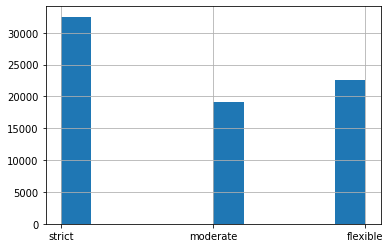

In [92]:
y_train.hist()

# Testing Set

In [93]:
test = df_test[['cancellation_policy','accommodates','number_of_reviews','room_type','city','cleaning_fee']]

In [94]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25458 entries, 0 to 25457
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   cancellation_policy  25458 non-null  object
 1   accommodates         25458 non-null  int64 
 2   number_of_reviews    25458 non-null  int64 
 3   room_type            25458 non-null  object
 4   city                 25458 non-null  object
 5   cleaning_fee         25458 non-null  bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 1019.4+ KB


In [95]:
change_test = []
for i in test['cancellation_policy']: 
    if i == 'super_strict_60':
        k = 'strict'
    if i == 'super_strict_30':
        k = 'strict'
    if i == 'long_term':
        k = 'strict'
    if i == 'strict':
        k = 'strict'
    if i == 'moderate':
        k = 'moderate'
    if i == 'flexible':
        k = 'flexible'
    change_test.append(k)
test['cancellation_policy'] = change_test

In [96]:
X_test = test[['accommodates','number_of_reviews','room_type','city','cleaning_fee']]
y_test = test['cancellation_policy']

In [97]:
list4 = []
for key in X_test.cleaning_fee:
    if key == True:
        f = 1
    if key == False:
        f = 0
    list4.append(f)
X_test['cleaning_fee'] = list4

In [98]:
X_test = pd.get_dummies(X_test,columns=['room_type','city'])

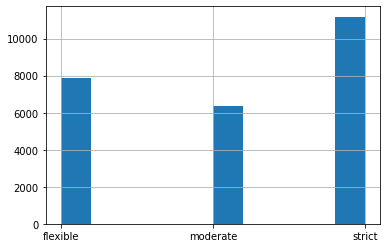

In [99]:
y_test.hist()

# Training and Testing

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [101]:
clf = RandomForestClassifier()

In [102]:
model = clf.fit(X_train,y_train)

In [103]:
y_pred = model.predict(X_test)

In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    flexible       0.56      0.59      0.58      7890
    moderate       0.33      0.15      0.21      6387
      strict       0.55      0.70      0.61     11181

    accuracy                           0.53     25458
   macro avg       0.48      0.48      0.47     25458
weighted avg       0.50      0.53      0.50     25458



In [105]:
clf_pruned_v2 = RandomForestClassifier(max_depth= 4)
model_v2 = clf_pruned_v2.fit(X_train,y_train)
y_pred_v2 = model_v2.predict(X_test)
print(classification_report(y_test,y_pred_v2))

              precision    recall  f1-score   support

    flexible       0.58      0.58      0.58      7890
    moderate       0.00      0.00      0.00      6387
      strict       0.53      0.84      0.65     11181

    accuracy                           0.55     25458
   macro avg       0.37      0.47      0.41     25458
weighted avg       0.41      0.55      0.47     25458



In [106]:
clf_pruned_v3 = RandomForestClassifier(max_depth= 5)
model_v3 = clf_pruned_v3.fit(X_train,y_train)
y_pred_v3 = model_v3.predict(X_test)
print(classification_report(y_test,y_pred_v3))

              precision    recall  f1-score   support

    flexible       0.59      0.59      0.59      7890
    moderate       0.00      0.00      0.00      6387
      strict       0.53      0.84      0.65     11181

    accuracy                           0.55     25458
   macro avg       0.37      0.47      0.41     25458
weighted avg       0.42      0.55      0.47     25458



In [107]:
clf_pruned_v4 = RandomForestClassifier(n_estimators= 200, max_depth= 5)
model_v4 = clf_pruned_v4.fit(X_train,y_train)
y_pred_v4 = model_v4.predict(X_test)
print(classification_report(y_test,y_pred_v4))

              precision    recall  f1-score   support

    flexible       0.59      0.59      0.59      7890
    moderate       0.00      0.00      0.00      6387
      strict       0.53      0.84      0.65     11181

    accuracy                           0.55     25458
   macro avg       0.37      0.48      0.41     25458
weighted avg       0.42      0.55      0.47     25458



> From the result, we can see moderate column is really low in terms of precision and recall. When recall and precision is 0, that means there is 0 true posistve during the prediction. Rather than doing more parameter tunning and GridSearch, we should consider to merge the moderate column to flexible category or strict category, in this case, to keep a balance, I think merge with flexible column is better. 

# Merge Moderate with Flexible Category

In [108]:
# change_moderate1 = []
# for i in y_train:
#     if i == 'moderate':
#         k = 'flexible'
#     if i == 'strict':
#         k = 'strict'
#     if i == 'flexible':
#         k = 'flexible'
#     change_moderate1.append(k)
# y_train = change_moderate1

In [109]:
# change_moderate2 = []
# for i in y_test:
#     if i == 'moderate':
#         m = 'flexible'
#     if i == 'strict':
#         m = 'strict'
#     if i == 'flexible':
#         m = 'flexible'
#     change_moderate2.append(m)
# y_test = change_moderate2

In [110]:
# y_train = pd.Series(y_train)
# y_test = pd.Series(y_test)

In [111]:
# y_train.hist()
# y_test.hist()

In [112]:
# clf_pruned_opt = RandomForestClassifier(max_depth= 5)
# model_opt = clf_pruned_opt.fit(X_train,y_train)
# y_pred_opt = model_opt.predict(X_test)
# print(classification_report(y_test,y_pred_opt))

# Merge with Strict Category

In [113]:
change_moderate3 = []
for i in y_train:
    if i == 'moderate':
        k = 'strict'
    if i == 'strict':
        k = 'strict'
    if i == 'flexible':
        k = 'flexible'
    change_moderate3.append(k)
y_train = change_moderate3

In [114]:
change_moderate4 = []
for i in y_test:
    if i == 'moderate':
        m = 'strict'
    if i == 'strict':
        m = 'strict'
    if i == 'flexible':
        m = 'flexible'
    change_moderate4.append(m)
y_test = change_moderate4

In [115]:
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

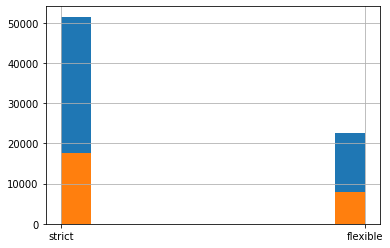

In [116]:
y_train.hist()
y_test.hist()

In [117]:
clf_pruned_opt2 = RandomForestClassifier(max_depth= 5)
model_opt2 = clf_pruned_opt2.fit(X_train,y_train)
y_pred_opt2 = model_opt2.predict(X_test)
print(classification_report(y_test,y_pred_opt2))

              precision    recall  f1-score   support

    flexible       0.73      0.37      0.49      7890
      strict       0.77      0.94      0.84     17568

    accuracy                           0.76     25458
   macro avg       0.75      0.65      0.67     25458
weighted avg       0.76      0.76      0.74     25458



In [124]:
from sklearn.metrics import log_loss
pred_loss = model_opt2.predict_proba(X_test)
log_loss(y_test,pred_loss)

0.5081959411629707

In [118]:
# from sklearn.model_selection import GridSearchCV
# parameter = {
#     'bootstrap': [True],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
# }
# clf_improve = RandomForestClassifier(n_jobs = -1,max_depth = 5)
# random_forest_gird = GridSearchCV(clf_improve,parameter)
# model_grid = random_forest_gird.fit(X_train,y_train)
# y_improved_pred = model_grid.predict(X_test)
# print(classification_report(y_test,y_improved_pred))